## This script will search the givin position.xlsx file for the axis value and give the associated filename. It also plots the 0.6mm PZT vs the 1.2mm PZT signals.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scipy
from pathlib import Path
import scipy.io as scipy

def searchPos(position_df, axis0, axis2, axis1):
    signal_names=[]
    for a1 in axis1:
        sig= position_df.loc[(position_df['Axis1']==a1) & (position_df['Axis2']==axis2) & (position_df['Axis0']==axis0)]
        try:
            signal_names += [sig['filename'].values[0]]
        except:
            print(sig)
    return signal_names

### Getting the position number

In [16]:
rootPath= 'Y://Beacon_Datalibrary/RX_3D_WaterTank/3D_GE_PGE2A616_400ms'
filePath= os.path.join(rootPath,'position.xlsx')
position_df= pd.read_excel(filePath, sheet_name= 'scan_position_tag')
axis0=60
axis2=0.02
axis1=[1, 2, 4, 6, 8] 
sigNames= searchPos(position_df, axis0, axis2, axis1)
pos= ''
for name in sigNames:
    pos= pos+ name.split('_')[1] + ", "
print('Position Number: ', pos[0:-2])

Position Number:  1864, 1887, 1933, 1979, 2025


### Generating Plot of 0.6mm PZT vs 1.2mm PZT 

Text(0.5, 1.0, 'eZono Axis0:50mm; Axis1:0mm; Axis2:0.02mm')

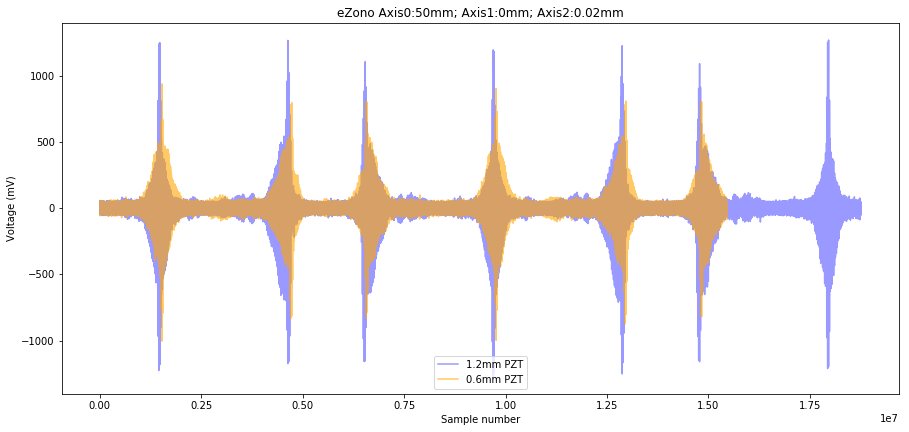

In [9]:
# Getting the data
root1= Path('Y:/Beacon_Datalibrary/RX_3D_WaterTank/3D_eZono_PGE2A1234_300ms')
root2= Path('Y:/Beacon_Datalibrary/RX_3D_WaterTank/3D_eZono_PGE2A616_300ms')
sig3= os.path.join(root1, 'Pos_1473_eZono_PGE2A1234.mat')
sig4= os.path.join(root2,'Pos_1473_eZono_PGE2A616.mat')
data= scipy.loadmat(sig3, variable_names= 'chA')
data3= data['chA']
data= scipy.loadmat(sig4, variable_names= 'chA')
data4= data['chA']

# Plotting
f= plt.figure(figsize=(15,15))
ax1 = f.add_subplot(211)
ax1.plot(data3, alpha=0.4, color='blue', label='1.2mm PZT')
ax1.plot(data4[3300000:-1], alpha=0.6, color='orange', label='0.6mm PZT')
ax1.legend()
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Voltage (mV)')
ax1.set_title('eZono Axis0:50mm; Axis1:0mm; Axis2:0.02mm')

In [ ]:
625/2

In [3]:
len(data4)

18750000